> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### DataSet Description
This data set ('tmdb-movies.csv') contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions
As checked in the below cells, after studing the data, there are few key aspects which would like to explore in this project:

* Which type of movie genre has the heighest and the lowest vote_average?
* What is the tend of budget for making a movie over time, lets see this via 'budget_adj' field?
* Which actors have the highest summed revenue for their movies? 
* Which directors have the highest summed revenue for their movies? 
* What is the Corelation between popularity of movie and its vote average?
* What is the Corelation of vote_average with respect to runtime, vote_count, revenue_adj or budget_adj?

In [25]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# visualizations are plotted inline with the notebook
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [40]:
# Load data into DataFrame
df = pd.read_csv('tmdb-movies.csv')

In [41]:
# Print out a few lines from the loaded DataFrame. 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
# Check the size of the data and number of Columns per record.
df.shape

(10866, 21)

Above, we see that the total number of records(rows) are 10866.

In [43]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Values like popularity, budget, revenue, runtime, vote_count, vote_average, budget_adj, revenue_adj are already in integer or float form, which in teran will help us in analysis. One value which I would like to change is 'release_date' which is currently string, lets change this to datetime object, which I'll do in data cleaning process below. 

Lets also See the number of NaN entries in the dataframe:

In [44]:
# For below solution, I used this "https://stackoverflow.com/questions/39421433/efficient-way-to-find-null-values-in-a-dataframe"
# StackOverflow page for assistance.
def list_null_count(df):
    null_counts = df.isnull().sum()
    print ('Total Null entries with respect to each column:')
    return null_counts.sort_values(ascending=False)  
    
list_null_count(df)

Total Null entries with respect to each column:


homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

By above data, we can see that there are some columns which have a significant count of missing values. But all of the columns which have int or fload data have values in them.

In below cell lets count the number of unique values in each column:

In [45]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nunique.html
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In above cell's output we can see that there are lot of unique data, one thing we notice that there are total 56 unique year's data we have got.
Additionally if you see, the total number of Records are 10866, but unique 'id' are 10865, which means there is one record which is repeated. We will remove that in our data cleaning process.

In [46]:
# Show description of Data:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* Runtime varies from 0 to 900
* vote_average varies from 10 to 9767
* Overall all the movies are from year 1960 to 2015


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)
To clean data we will perform:
* Remove duplicate data
* Change 'release_year' from string to datetime object
* Replace NaN in genres, cast, director, and tagline with empty string.
* Seperate multiple values separated by pipe (|) characters in python lists

#### Remove Duplicate data
As we have checked aboove, there was one row which was duplicate, so lets first remove that:

In [47]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Step 1: show count of duplicate rows (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):
print ("Total duplicate rows: {}".format(sum(df.duplicated())))

Total duplicate rows: 1


Now lets delete this duplicate row:

In [48]:
# Step 2: Remove duplicate: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
df = df.drop_duplicates()
print ("Total duplicate rows after drop_duplicates: {}".format(sum(df.duplicated())))

Total duplicate rows after drop_duplicates: 0


Lets fix data type by conversion:

In [49]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Lets check the data types to confirm that the date type is changed
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

"release_date" column is changed from "Object" to "datetime64[ns]", 
Now, lets replace NaN to Empty strings:

In [50]:
# check Nan info: genres, tagline and cast
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [51]:
# Lets now clear the NaNs in the columns we are interested in:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string

def replace_NaN_by_empty_string(data, lable):
    data[lable] = data[lable].fillna('')
    return data
df = replace_NaN_by_empty_string(df, 'genres')
df = replace_NaN_by_empty_string(df, 'tagline')
df = replace_NaN_by_empty_string(df, 'cast')

# check Nan info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 10865 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj      

we can see that the Nans in the genres, tagline and cast are removed

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question: Which type of movie genre has the heighest and the lowest vote_average?

In [59]:
# Lets assume that the first genre in the list is the most releavent. Assuming that, lets create a new column 'releavent_genre',
# which will contain the first genre:
def split_and_take_first_item(x):
    return x.split('|')[0]

df['releavent_genre'] = df['genres'].apply(split_and_take_first_item)


In [60]:
#Lets cheack if the new column is added:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,releavent_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


Based on the new column, now let's see which genre has the highest and lowest vote_average':

In [69]:
releavent_genre_sorted_for_mean = df.groupby('releavent_genre')['vote_average'].mean().sort_values(ascending=False) 
releavent_genre_sorted_for_mean

releavent_genre
Documentary        6.923380
Music              6.605000
                   6.421739
Animation          6.414888
History            6.381818
Crime              6.217632
Drama              6.200448
War                6.183051
Romance            6.133871
Western            6.080952
Adventure          6.052048
Science Fiction    5.963551
Family             5.945833
Mystery            5.900800
Foreign            5.900000
Comedy             5.882924
Fantasy            5.795956
TV Movie           5.793590
Action             5.752327
Thriller           5.634420
Horror             5.318798
Name: vote_average, dtype: float64

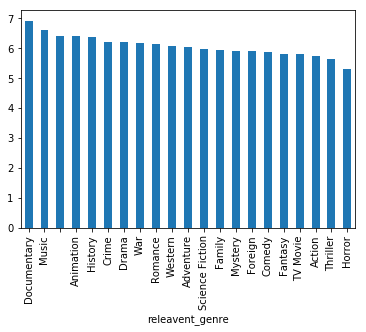

In [70]:
# Lets plot a bargraph of this data:
releavent_genre_sorted_for_mean.plot(kind='bar')

We can clearly see that 
* The Gerne with the highest vote_average is "Documentry" followed by "Music".
* The Gerne with the lowest vote_average is "Horror" followed by "Thriller".

### Research Question: What is the tend of budget for making a movie over time, lets see this via 'budget_adj' field?

In [71]:
# Lets first create a dataframe from given df which has columns where value of budget_adj is not equal to 0
df_budget_adj = df[df.budget_adj != 0]
df_budget_adj.shape

(5169, 22)

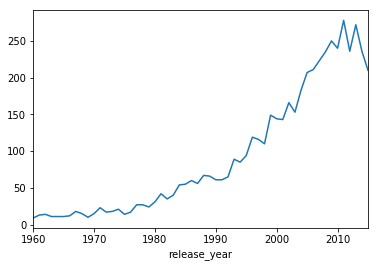

In [73]:
# Total Movies count
df_budget_adj.groupby('release_year')['budget_adj'].count().plot()

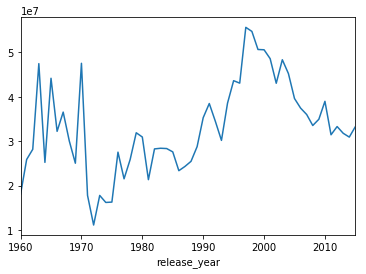

In [74]:
# Mean adjusted budget over the years
df_budget_adj.groupby('release_year')['budget_adj'].mean().plot()

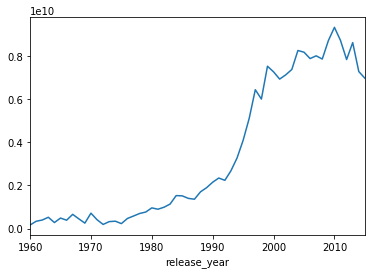

In [75]:
# Sum of budget put into movies every year.
df_budget_adj.groupby('release_year')['budget_adj'].sum().plot()

We can see in the above two graphs that adjusted budget mean value had a diffent trend at different time, but to understand this when we see the total number of moved made in that perticuler year, we see that over time the number of movies made each and every ear is increasing, which in retun effect the mean of the adjusted budget over the years. 

So finally we check the total sum put into making of movies over the year, as the data is I've thought, increasing rapidly over time. 

We can say that adjusted budget mean over the years has increased and decreased since lot and lot of movies are being made each and every coming year. Sinxce 2000 , the number of movies per year has significantly increased, to the mean has shifted and pulled the average adjusted mean down.

### Research Question: Which actors have the highest summed revenue for their movies? 

In [76]:
# Similar to what we have done in Gerne, we'll take the first actor/actress form the cast assuming as them
# the lead character in the movie, so lets create a new column whith the most releavent actor or cast

df['releavent_cast'] = df['cast'].apply(split_and_take_first_item)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,releavent_genre,releavent_cast
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel


In [77]:
# Since we now have new column which gives the releavent/first cast, we will check the first/top 10 casts which are in biggest 
# revenue collection movies.
# We first group on "releavent_cast" and on revenue_adj column we sum them, sort them and get first 10 casts
releavent_cast_sorted_for_sum = df.groupby('releavent_cast')['revenue_adj'].sum().sort_values(ascending=False)[:10]
releavent_cast_sorted_for_sum

releavent_cast
Tom Cruise               9.909573e+09
Tom Hanks                9.869998e+09
Harrison Ford            8.519046e+09
Daniel Radcliffe         8.483593e+09
Johnny Depp              6.938329e+09
Sylvester Stallone       6.404048e+09
Bruce Willis             6.312188e+09
Robert Downey Jr.        6.105985e+09
Sean Connery             6.045493e+09
Arnold Schwarzenegger    5.970958e+09
Name: revenue_adj, dtype: float64

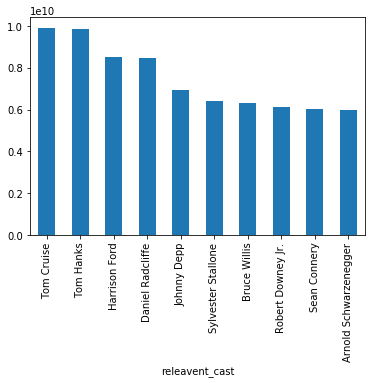

In [78]:
# Plot the values on bar graph
releavent_cast_sorted_for_sum.plot(kind='bar')

We can see that the Tom Cruise and Tom Hanks are the twoi cast are which have got the highest revenue for their movies followed by harrison ford

### Research Question: Which directors have the highest summed revenue for their movies?

In [79]:
director_df_sum = df.groupby('director')['revenue_adj'].sum().sort_values(ascending=False)[:10]
director_df_sum

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Michael Bay         5.460672e+09
Chris Columbus      5.094077e+09
Tim Burton          4.529285e+09
Ron Howard          4.527095e+09
Ridley Scott        4.219566e+09
Name: revenue_adj, dtype: float64

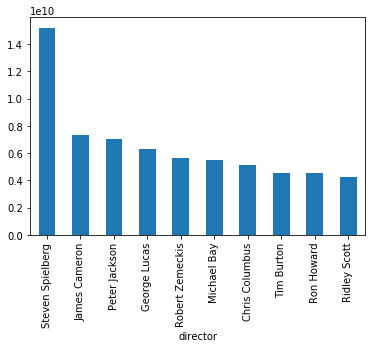

In [80]:
director_df_sum.plot(kind='bar')

With the above graph, we can say that moves directed by Steven Spielberg generate way more revenue than by other directors, followed by James Cameron.

### Research Question 3  (Replace this header name!)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!